## This dataset contains rows of known fraud and valid transactions made over Ethereum.

### Task: EDA & Prediction of Fraud/Valid Transaction

Here is a description of the rows of the dataset:
* Index: the index number of a row
* Address: the address of the ethereum account
* FLAG: whether the transaction is fraud or not
* Avg min between sent tnx: Average time between sent transactions for account in minutes
* Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes
* TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction
* Sent_tnx: Total number of sent normal transactions
* Received_tnx: Total number of received normal transactions
* NumberofCreated_Contracts: Total Number of created contract transactions
* UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions
* UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions
* MinValueReceived: Minimum value in Ether ever received
* MaxValueReceived: Maximum value in Ether ever received
* AvgValueReceived5Average value in Ether ever received
* MinValSent: Minimum value of Ether ever sent
* MaxValSent: Maximum value of Ether ever sent
* AvgValSent: Average value of Ether ever sent
* MinValueSentToContract: Minimum value of Ether sent to a contract
* MaxValueSentToContract: Maximum value of Ether sent to a contract
* AvgValueSentToContract: Average value of Ether sent to contracts
* TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions
* TotalEtherSent:Total Ether sent for account address
* TotalEtherReceived: Total Ether received for account address
* TotalEtherSent_Contracts: Total Ether sent to Contract addresses
* TotalEtherBalance: Total Ether Balance following enacted transactions
* TotalERC20Tnxs: Total number of ERC20 token transfer transactions
* ERC20TotalEther_Received: Total ERC20 token received transactions in Ether
* ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether
* ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether
* ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses
* ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses
* ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses
* ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes
* ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes
* ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions
* ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account
* ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account
* ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account
* ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account
* ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account
* ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account
* ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred
* ERC20UniqRecTokenName: Number of Unique ERC20 tokens received
* ERC20MostSentTokenType: Most sent token for account via ERC20 transaction
* ERC20MostRecTokenType: Most received token for account via ERC20 transactions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve, RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, roc_auc_score, plot_confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
import lightgbm as lgb

import os

In [2]:
ds = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=[0])
ds.drop(columns='Index', inplace=True)

In [3]:
# sampling some observations
print(ds.shape)
ds.sample(3)

(9841, 49)


,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
876,0x1586a94db88cf281688d0c44e33749fa9d154055,0,0.00,0.00,21.48,1,1,0,1,1,0.868700,0.868700,0.868700,0.868196,0.868196,0.868196,0.0,0.0,0.0,2,0.868196,0.8687,0.0,0.000504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5649,0x968fd08c71e989d2fdff654401ae4588e3c8c5dd,0,12.28,18447.42,203032.08,9,11,0,10,1,0.100000,1.400000,0.510909,0.189475,1.399537,0.623964,0.0,0.0,0.0,20,5.615679,5.6200,0.0,0.004321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1786,0x2eea780fc805a4351a121723c15ded99b01fb5d5,0,165.76,0.21,331.93,2,2,0,2,2,48.403768,52.596232,50.500000,0.049000,100.949974,50.499487,0.0,0.0,0.0,4,100.998974,101.0000,0.0,0.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [4]:
# column names
display(ds.columns)

# describtion of numeratic columns
display(ds.describe())

# Non-Null Count and type of columns
display(ds.info())

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tn

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

None

### Categorical columns

In [5]:
# How many non-unique adresses?
_, uniq_idx, counts = np.unique(ds['Address'].to_numpy(), return_index=True, return_counts=True)
non_unique_addresses_idx = uniq_idx[counts > 1]
print("non-unique adresses count: {}".format(len(non_unique_addresses_idx), end='\n\n'))
# What are the flags of non-uniqe adresses
non_unique_addresses_flags = ds.iloc[non_unique_addresses_idx]['FLAG']
print("flags of non-unique adresses: ", end='')
print(*non_unique_addresses_flags)

ds.drop(columns='Address', inplace=True)

non-unique adresses count: 25
flags of non-unique adresses: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


Columns 'ERC20 most sent token type' and ' ERC20_most_rec_token_type' contain token types. Most of tokens occur only once so they seem irrelevant in fraud detection.

In [6]:
display(np.unique(ds[' ERC20 most sent token type'].astype(str)))
display(np.unique(ds[' ERC20_most_rec_token_type'].astype(str)))

ds.drop(columns=[' ERC20 most sent token type', ' ERC20_most_rec_token_type'], inplace=True)

array(['\x01', ' ', '$7RIP$', "''", '0', '0xBitcoin Token',
       '0xcert Protocol Token', '1World', '300 Token', 'AION',
       'ARBITRAGE', 'AVT', 'AdBank', 'AdEx', 'Aditus', 'Adshares',
       'Aeron', 'Aeternity', 'Aigang', 'AirSwap', 'AirToken',
       'AnyCoinVer10', 'AppCoins', 'Aragon', 'ArcBlock',
       'Arcona Distribution Contract', 'Authorship', 'BAI', 'BANCA',
       'BANKEX', 'BAT', 'BCDN', 'BCG.to', 'BCShareS', 'BIX Token',
       'BMChain Token', 'BNB', 'BOMB', 'BUZCOIN', 'Bancor',
       'Banker Token', 'BinaryCoin', 'BitDice', 'BizCoin',
       'Blackmoon Crypto Token', 'BlockchainPoland', 'Blocktix',
       'Bounty0x', 'Brickblock', 'Bytom', 'CCRB', 'CRYPTOPUNKS',
       'Cai Token', 'CarTaxi', 'Cashaa', 'Celsius', 'Centra',
       'ChainLink Token', 'ChangeBank', 'CharterCoin', 'Cindicator',
       'Civic', 'Cobinhood', 'Cofoundit', 'CoinBene Coin', 'CoinBoin',
       'CoinDash', 'Countinghouse Fund', 'Covalent Token', 'Covesting',
       'Crypterium', 'Crypto.com

array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

### Numerical columns

class : count : percent
0     : 7662  : 77.86%
1     : 2179  : 22.14%


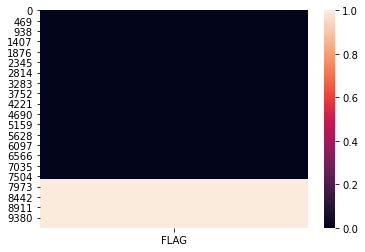

In [7]:
# are classes balanced?
print('class : count : percent')
print('0     : {}  : {:.2%}'.format(sum(ds['FLAG']==0), sum(ds['FLAG']==0)/len(ds['FLAG']) ))
print('1     : {}  : {:.2%}'.format(sum(ds['FLAG']==1), sum(ds['FLAG']==1)/len(ds['FLAG']) ))

sns.heatmap(ds.iloc[:,:1])
plt.show()

Dataset is unbalanced, we must remember about this when choosing our model metric.

Deleting columns that holds only zeros.

In [8]:
ds.drop(columns=[' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
                 ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract', ' ERC20 avg time between sent tnx'], inplace=True)

,ERC20 uniq rec token name,ERC20 uniq sent addr.1,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,total ether received,total ether balance,total ether sent contracts,FLAG,Avg min between sent tnx,min value received,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,max value received,total transactions (including tnx to create contract,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total Ether sent
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,8.423941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


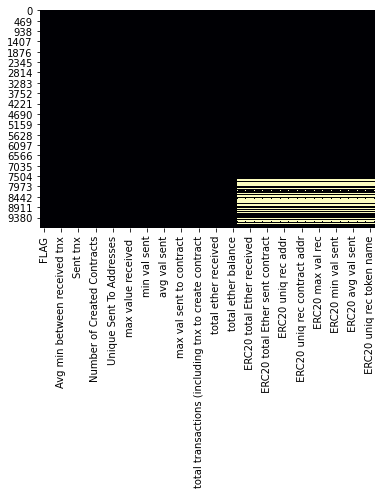

In [9]:
# missing values
missing_values = ds.isna()
missing_percent = missing_values.sum() / ds.shape[0] * 100
missing_df = pd.DataFrame([missing_values.sum(), missing_percent], ['count', 'percent'])
display(missing_df.sort_values(by='percent', axis=1, ascending=False))
missing_df.sort_values(by='percent', axis=1, ascending=False).to_csv('missing.csv')

sns.heatmap(missing_values, cbar=False, cmap='magma')
plt.show()

Looks like missing values are highly connected to fraud cases

In [10]:
non_fraud_rows, fraud_rows = np.where( [ds.iloc[:,0]==1] )
print(ds.iloc[fraud_rows,:].isna().sum()[-20:])

total Ether sent                      0
total ether received                  0
total ether sent contracts            0
total ether balance                   0
 Total ERC20 tnxs                   829
 ERC20 total Ether received         829
 ERC20 total ether sent             829
 ERC20 total Ether sent contract    829
 ERC20 uniq sent addr               829
 ERC20 uniq rec addr                829
 ERC20 uniq sent addr.1             829
 ERC20 uniq rec contract addr       829
 ERC20 min val rec                  829
 ERC20 max val rec                  829
 ERC20 avg val rec                  829
 ERC20 min val sent                 829
 ERC20 max val sent                 829
 ERC20 avg val sent                 829
 ERC20 uniq sent token name         829
 ERC20 uniq rec token name          829
dtype: int64


As we expected every missing value is in fraud rows. That means that almost 40% of fraud rows have missing values.

In [11]:
missing_columns = ds.columns[ds.isna().sum() > 0]

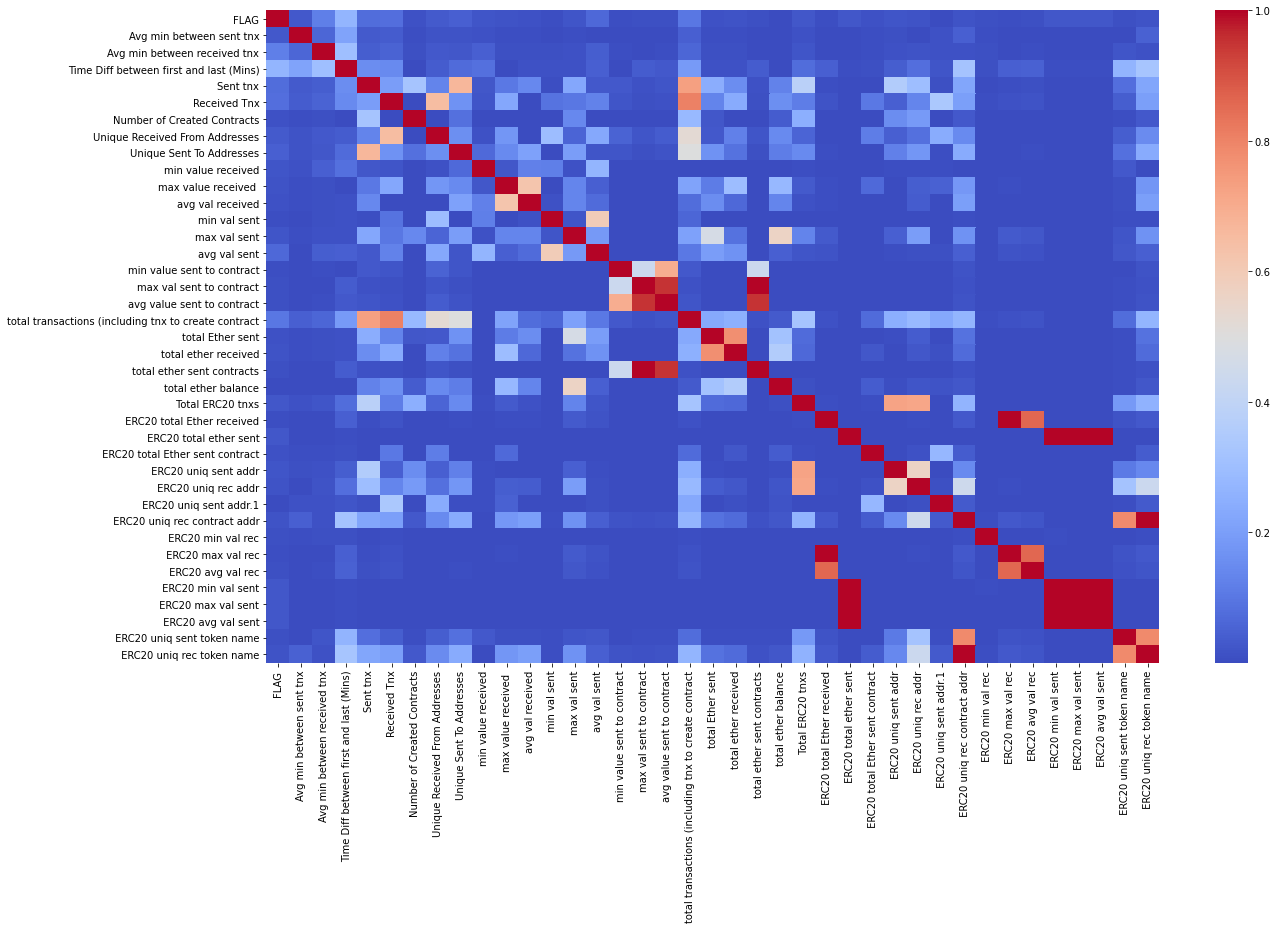

In [12]:
# correlation
corr = ds.corr()
plt.figure(figsize=(20,12))
sns.heatmap(np.abs(corr), cmap='coolwarm')
plt.show()

## Data preprocessing

We left only numeratic features so preprocessing is limited to imputing null values with column mean and scaling.

In [13]:
preprocessing_pipeline = Pipeline([
    ('impoter', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

X = ds.drop(columns='FLAG').to_numpy()
y = ds['FLAG'].to_numpy()

random_permutation = np.random.permutation(len(X))
X = X[random_permutation]
y = y[random_permutation]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = preprocessing_pipeline.fit_transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

## Model selection

In [15]:
def evaluate_models(X, y, models, cv):
    f1_scores = dict()
    acc_scores = dict()
    
    for i, model in enumerate(models):
        clf_pipeline = make_pipeline(preprocessing_pipeline, model)
        results = cross_validate(clf_pipeline, X, y, cv=cv, scoring=['f1', 'accuracy'], n_jobs=-1)
        avg_f1 = np.mean(results['test_f1'])
        avg_acc = np.mean(results['test_accuracy'])
        
        model_name = model.__class__.__name__
        f1_scores[model_name] = avg_f1
        acc_scores[model_name] = avg_acc
        print('{}-of-{}: {} f1={}, acc={}'.format(i+1, len(models), model_name, avg_f1, avg_acc))
    return f1_scores, acc_scores

In [16]:
cv = StratifiedKFold(5, shuffle=True, random_state=42)

classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42),
    lgb.LGBMClassifier(random_state=42),
    xgb.XGBClassifier(random_state=42),
    SVC(random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    MLPClassifier(random_state=42),
]

In [17]:
f1_scores, acc_scores = evaluate_models(X, y, classifiers, cv)

1-of-9: LogisticRegression f1=0.45967195628645985, acc=0.8379222976460339
2-of-9: KNeighborsClassifier f1=0.8943329335872823, acc=0.9543743574180283
3-of-9: RandomForestClassifier f1=0.9558190499190877, acc=0.9809976898016822
4-of-9: LGBMClassifier f1=0.9714220861588372, acc=0.9875011354862153
5-of-9: XGBClassifier f1=0.9723556995892346, acc=0.9879077427772753
6-of-9: SVC f1=0.5316571088271883, acc=0.8456453587517083
7-of-9: AdaBoostClassifier f1=0.9514297078784251, acc=0.9786602914276983
8-of-9: GaussianNB f1=0.3848786563602101, acc=0.30687898194370467
9-of-9: MLPClassifier f1=0.9246712157414867, acc=0.9668729122537544


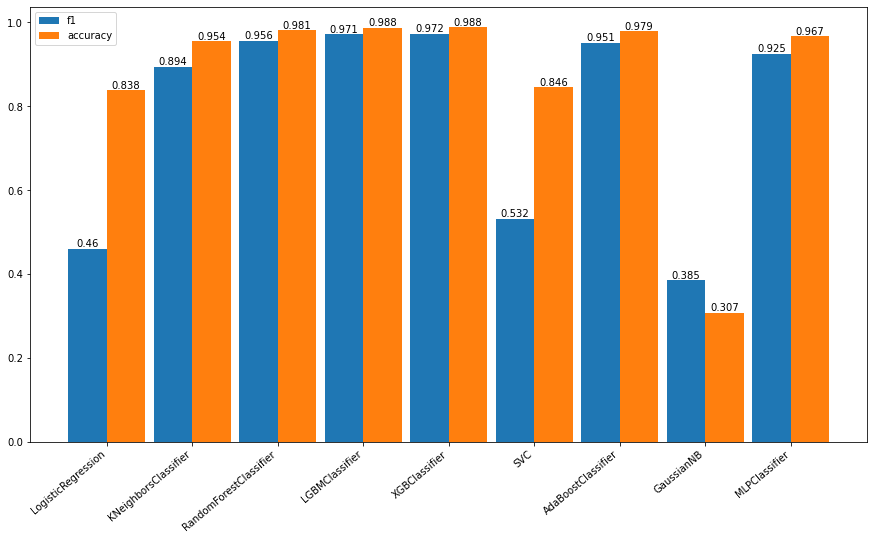

In [18]:
def visualize_scores(f1_scores, acc_scores):
    x = np.arange(len(f1_scores))
    width = 0.45
    
    f1_values = list(f1_scores.values())
    acc_values = list(acc_scores.values())
    
    plt.figure(figsize=(15, 8)).tight_layout()
    plt.bar(x - width / 2, f1_values, width, label='f1')
    plt.bar(x + width / 2, acc_values, width, label='accuracy')
    
    for index, value in enumerate(x - width / 2):
        plt.text(value, f1_values[index], '{:.3}'.format(f1_values[index]),
                 verticalalignment='bottom', horizontalalignment='center', fontsize=10)

    for index, value in enumerate(x + width / 2):
        plt.text(value, acc_values[index], '{:.3}'.format(acc_values[index]),
                 verticalalignment='bottom', horizontalalignment='center', fontsize=10)    
    
    classifiers_names = f1_scores.keys()
    plt.xticks(x, classifiers_names, rotation=40, horizontalalignment='right', fontsize=10)
    plt.legend()

visualize_scores(f1_scores, acc_scores)

### XGBClassifier hyperparameter tuning

In [20]:
xgb_parameters = {
    'xgbclassifier__n_estimators': range(1000, 4001, 1000),
    'xgbclassifier__gamma': [0, 0.5, 1],
    'xgbclassifier__max_depth': [5, 6, 7]
}

xgb_pipeline = make_pipeline(preprocessing_pipeline, xgb.XGBClassifier(random_state=42))
# xgb_pipeline.steps
xgb_grid_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=xgb_parameters,
    scoring = 'f1',
    n_iter = 12,
    n_jobs = -1,
    cv = 5,
    random_state=42
)

xgb_grid_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('impoter',
                                                               SimpleImputer()),
                                                              ('scaler',
                                                               StandardScaler())])),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            gamma=None,
                                                            gpu_id=N

In [21]:
#grid_search.grid_scores_
display(xgb_grid_search.best_score_)
display(xgb_grid_search.best_params_)

0.9716704230093555

{'xgbclassifier__n_estimators': 2000,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__gamma': 0.5}

In [22]:
LGBM_parameters = {
        'lgbmclassifier__bagging_fraction': [0, 0.2, 0.5, 0.8, 1],
        'lgbmclassifier__feature_fraction': [0.5, 0.8],
        'lgbmclassifier__max_depth': [6, 10, 13, 16, 20],
        'lgbmclassifier__min_data_in_leaf': range(40, 180, 20),
        'lgbmclassifier__num_leaves': range(500, 2500, 300)
}

LGBM_pipeline = make_pipeline(preprocessing_pipeline, lgb.LGBMClassifier(random_state=42))
LGBM_grid_search = RandomizedSearchCV(
    LGBM_pipeline,
    param_distributions=LGBM_parameters,
    scoring = 'f1',
    n_iter = 60,
    n_jobs = -1,
    cv = 5,
    random_state=42
)

LGBM_grid_search.fit(X, y)

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('impoter',
                                                               SimpleImputer()),
                                                              ('scaler',
                                                               StandardScaler())])),
                                             ('lgbmclassifier',
                                              LGBMClassifier(random_state=42))]),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'lgbmclassifier__bagging_fraction': [0,
                                                                             0.2,
                                                                             0.5,
                                                                             0.8,
                                                                             1],
          

In [23]:
display(LGBM_grid_search.best_score_)
display(LGBM_grid_search.best_params_)

0.9727674170665799

{'lgbmclassifier__num_leaves': 1400,
 'lgbmclassifier__min_data_in_leaf': 100,
 'lgbmclassifier__max_depth': 10,
 'lgbmclassifier__feature_fraction': 0.8,
 'lgbmclassifier__bagging_fraction': 0.5}

In [25]:
RFC_parameters = {
        'randomforestclassifier__n_estimators': range(50, 1050, 100),
        'randomforestclassifier__max_depth': range(50, 300, 20),
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__bootstrap': [True, False]
}

RFC_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state=42))
RFC_grid_search = RandomizedSearchCV(
    RFC_pipeline,
    param_distributions=RFC_parameters,
    scoring = 'f1',
    n_iter = 24,
    n_jobs = -1,
    cv = 5,
    random_state=42
)

RFC_grid_search.fit(X, y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('impoter',
                                                               SimpleImputer()),
                                                              ('scaler',
                                                               StandardScaler())])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'randomforestclassifier__bootstrap': [True,
                                                                              False],
                                        'randomforestclassifier__max_depth': range(50, 300, 20),
                                        'randomforestclassifier__min_samples_leaf': [1,
                                              

In [26]:
display(RFC_grid_search.best_score_)
display(RFC_grid_search.best_params_)

0.962111595699896

{'randomforestclassifier__n_estimators': 550,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__max_depth': 130,
 'randomforestclassifier__bootstrap': False}

## Best model evaluation

In [27]:
best_model = lgb.LGBMClassifier(num_leaves=1400, min_data_in_leaf=100, max_depth=10,
    feature_fraction=0.8, bagging_fraction=0.5, random_state=42)

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_test)

f1 score = 0.9785794813979707
ROC AUC score = 0.9857879190666077
accuracy score = 0.9903504316912138


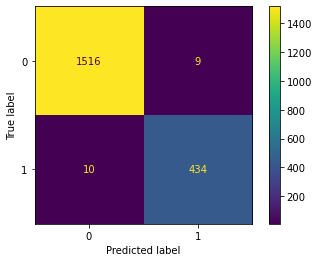

In [28]:
print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions)))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(best_model, X_test, y_test))

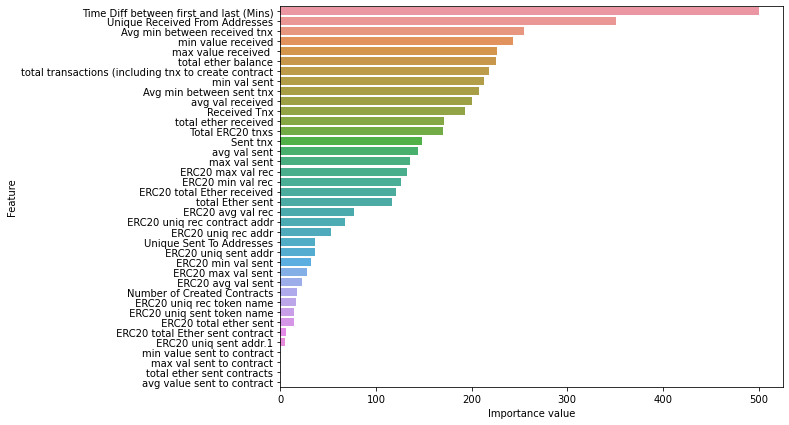

In [29]:
def plot_features_importance(feature_importance):
    column_names = ds.drop(columns='FLAG').columns

    df_feature_importance = pd.DataFrame(sorted(zip(feature_importance, column_names)),
                                       columns=['Importance value', 'Feature'])
    df_feature_importance = df_feature_importance.sort_values('Importance value', ascending=False)

    plt.figure(figsize=(9, 7)).tight_layout()
    sns.barplot(y="Feature", x="Importance value", data=df_feature_importance)
    plt.show()

plot_features_importance(best_model.feature_importances_)